[課題のURL](https://diver.diveintocode.jp/curriculums/1632)

# Week2授業課題2 富士下山問題

* 標高データの取得

In [5]:
import numpy as np
import pandas as pd
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import platform

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [6]:
print(fuji)
#　左から順番に  
# 「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


# 【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

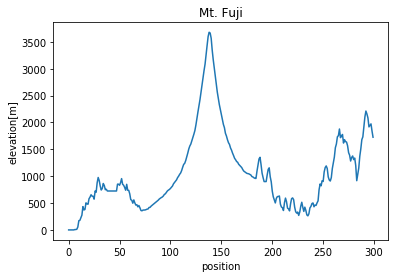

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 標高
#print(fuji[:,3])

# 地点0からの距離
#print(fuji[:,0])

# 折れ線グラフを出力

plt.plot(fuji[:,0], fuji[:,3])

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

# 【問題2】ある地点の勾配を計算する関数を作成

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による  
勾配を求める関数を作成してください。

In [8]:
# x:その地点の番号(1<= x <= 299)
# x=0はスタート地点なので"今いる隣の地点の番号"が存在しないので勾配0とする

def calc_gradient(x=0):

    if (1 <= x and x <= 299):
        
        # x, yの変化量を求める
        delta_x = fuji[x, 0] - fuji[(x-1), 0]
        delta_y = fuji[x, 3] - fuji[(x-1), 3]
        
        # 勾配を求める
        gradient = delta_y/delta_x
    
    else:
        # print("xは1以上から299以下の値です.")

        gradient = 0
        
    return gradient

#gradient = calc_gradient(300)
#print(gradient)

# 【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α×今いる地点の勾配」 となります。

In [41]:
# 移動先の地点 = 今いる地点 - α×今いる地点の勾配(start_point)
alpha = 0.2

def calc_goal( start_point=1, alpha=0.2):
    
    # 今いる地点の勾配を求める
    gradient = calc_gradient(start_point)
    
    # 移動先の地点を求める
    goal_point = start_point - alpha*gradient
    #print("goal_point", goal_point)
    
    # クリップ処理
    # 移動先の地点が負となる場合は0に丸める
    if goal_point < 0:
        goal_point = 0
    
    elif goal_point > 299:
    # 移動先の地点が300を超える場合は299に丸める
        goal_point = 299
    else:
    #何もしない
        pass
    
    # 四捨五入
    goal_point = Decimal(goal_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP)
    
    return goal_point


# 【問題4】山を下る関数を作成

山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

In [42]:
def calc_go_goal(start_point = 0):
    
    next_point = 0
    list_point = [start_point] # データ保存用
    
    # 移動先の地点が更新されなくなるまで、次の地点を更新する。
    for i in range(100):
        # print(i, start_point)

        # 次のポイントを求める
        next_point = calc_goal(int(start_point), alpha = 0.2)
        list_point.append(int(next_point))
    
        # ポイントが更新されているか確認する
        if start_point == next_point:
            # ポイントが更新されないので終了
            break
        else:
            # 求めるポイントを更新する
            start_point = next_point
    
    return list_point

In [43]:
list_point = calc_go_goal( start_point = 136)

print(list_point) # 75番で終了

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


# 【問題5】下山過程の可視化

[3434.59, 817.62, 741.17, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64, 371.19, 371.19]


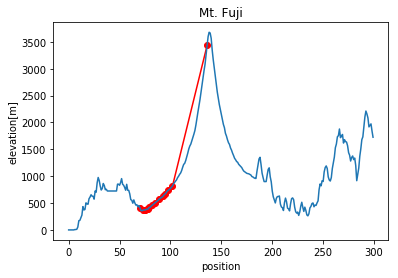

In [44]:
# 散布図の出力
list_high = []

# 次のポイントとその時の標高を求める。
for i in list_point:
    #print(i)
    list_high.append(fuji[i][3])

print(list_high)

plt.scatter(list_point, list_high, c="red") 
plt.plot(list_point, list_high, c="red")

# 折れ線グラフを出力
plt.plot(fuji[:,0], fuji[:,3])

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.show()

# 【問題6】初期値の変更

* 問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。

In [45]:
# x:その地点の番号(1<= x <= 299)
alpha = 0.2
start_point = 0
list_point = []

for i in fuji[:,0]:
    
    start_point = int(i)
    
    if start_point == 0:
        # スタート地点0はすでにgoalに到達している
        list_point = [start_point]
        pass
    else:
        list_point = calc_go_goal( start_point )
    
    print(list_point)

[0]
[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 5, 5]
[7, 7]
[8, 7, 7]
[9, 1, 1]
[10, 0, 0]
[11, 10, 0, 0]
[12, 2, 2]
[13, 4, 4]
[14, 0, 0]
[15, 27, 31, 51, 41, 41]
[16, 14, 0, 0]
[17, 0, 0]
[18, 22, 13, 4, 4]
[19, 21, 15, 27, 31, 51, 41, 41]
[20, 0, 0]
[21, 15, 27, 31, 51, 41, 41]
[22, 13, 4, 4]
[23, 28, 0, 0]
[24, 24]
[25, 36, 52, 37, 35, 43, 43]
[26, 0, 0]
[27, 31, 51, 41, 41]
[28, 0, 0]
[29, 10, 0, 0]
[30, 41, 41]
[31, 51, 41, 41]
[32, 47, 47]
[33, 27, 31, 51, 41, 41]
[34, 15, 27, 31, 51, 41, 41]
[35, 43, 43]
[36, 52, 37, 35, 43, 43]
[37, 35, 43, 43]
[38, 44, 44]
[39, 39]
[40, 40]
[41, 41]
[42, 42]
[43, 43]
[44, 44]
[45, 45]
[46, 46]
[47, 47]
[48, 22, 13, 4, 4]
[49, 49]
[50, 54, 58, 80, 80]
[51, 41, 41]
[52, 37, 35, 43, 43]
[53, 74, 74]
[54, 58, 80, 80]
[55, 63, 74, 74]
[56, 66, 74, 74]
[57, 35, 43, 43]
[58, 80, 80]
[59, 59]
[60, 73, 70, 78, 77, 75, 75]
[61, 83, 80, 80]
[62, 64, 52, 37, 35, 43, 43]
[63, 74, 74]
[64, 52, 37, 35, 43, 43]
[65, 76, 75, 75]
[66, 74, 74]
[67, 66, 74, 74]
[68,

* いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。  
機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

In [46]:
# 描画する関数
def write_mtfuji(list_point = [0]):
    
    # 散布図の出力
    list_high = []

    # 次のポイントとその時の標高を求める。
    for i in list_point:
        #print(i)
        list_high.append(fuji[i][3])

    print(list_high)

    plt.scatter(list_point, list_high, c="red") 
    plt.plot(list_point, list_high, c="red")

    # 折れ線グラフを出力
    plt.plot(fuji[:,0], fuji[:,3])

    plt.title("Mt. Fuji")
    plt.xlabel("position")
    plt.ylabel("elevation[m]")

    plt.show()
    
    return

[919.16, 724.5, 724.5]


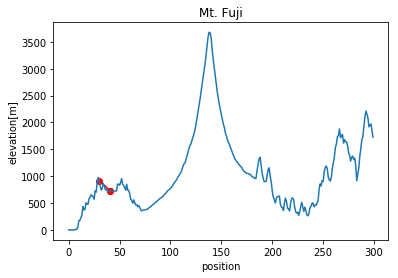

In [47]:

list_point = calc_go_goal( start_point = 30)
write_mtfuji(list_point)

[831.0, 831.6, 738.3, 420.6, 420.6]


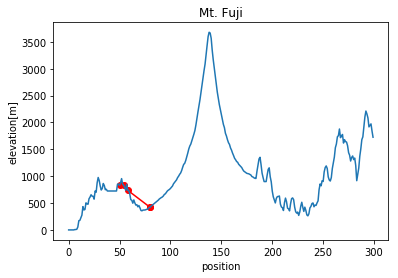

In [48]:
list_point = calc_go_goal( start_point = 50)
write_mtfuji(list_point)

[3567.76, 1525.57, 1095.73, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91, 1033.52, 993.63]


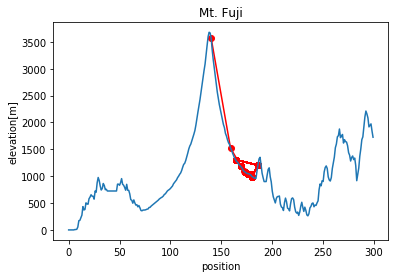

In [31]:
list_point = calc_go_goal( start_point = 140)
write_mtfuji(list_point)

[1056.99, 425.04, 901.57, 1191.05, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15, 270.33, 491.04, 440.61, 622.89, 620.23, 990.05, 344.44, 855.15]


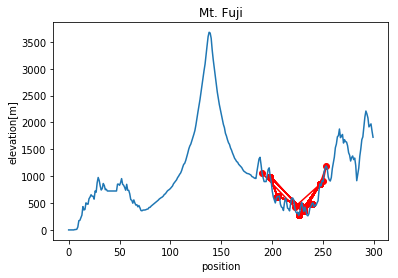

In [49]:
list_point = calc_go_goal( start_point = 190)
write_mtfuji(list_point)

[1309.46, 2158.71, 1725.8, 1725.8]


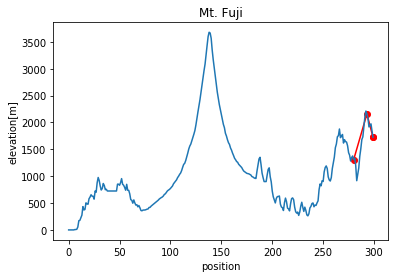

In [51]:
list_point = calc_go_goal( start_point = 280)
write_mtfuji(list_point)